In [2]:
import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point
from geopandas import GeoDataFrame
import os
import seaborn as sns

pd.set_option("display.max_colwidth", 0)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.options.display.float_format = '{:.5f}'.format

import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import logging
import datetime

nblog = open("./logs/explore_localness_"+str(datetime.datetime.now())+".log", "a+")
sys.stdout.echo = nblog
sys.stderr.echo = nblog

get_ipython().log.handlers[0].stream = nblog
get_ipython().log.setLevel(logging.INFO)

%autosave 5

Autosaving every 5 seconds


In [3]:
%%time
df_localness = pd.read_csv('./data/food_localness_final_oct_new.csv')
print('unique orders:',df_localness.shape[0])
print('unique accounts:',df_localness.account_id.unique().shape[0])
print('unique vendors:',df_localness.vendor_id.unique().shape[0])
df_localness.head(2)

unique orders: 2782961
unique accounts: 556124
unique vendors: 7794
CPU times: user 51.3 s, sys: 10.2 s, total: 1min 1s
Wall time: 1min 7s


,account_id,order_id,order_date,order_time,vendor_id,vendor_name,main_cuisine,vertical,delivery_fee_amount_lc,service_fee_amount_lc,basket_amount_lc,is_incentive_applied,incentive_amount_lc,pickup_id,customer_lon,customer_lat,vendor_lon,vendor_lat,order_time_hour,delivery_duration,total_duration,node_id,nearest_dist1,poi1,n_vertical,n_vendor_id,n_main_cuisine,n_vendor_name,n_vendor_lon,n_vendor_lat,vendor_index,pandana_distance_realdist,pandana_localness,speed,customer_loc_id,isweekend,price_per_item,entropy_0.5km,restaurant_count_0.5km,entropy_1km,poi_count_1km,entropy_2km,poi_count_2km,entropy_3km,poi_count_3km,entropy_4km,poi_count_4km,entropy_5km,poi_count_5km,restaurant_count_0.5_1km,restaurant_count_1_2km,restaurant_count_2_3km,restaurant_count_3_4km,restaurant_count_4_5km,estimated_rent,compensation,discounted delivery,free delivery,gem,item discount,menu discount,voucher wallet,incentives_type,incentive_delivery,incentive_menu_discount,incentive_voucher_wallet,rating,n_rating,consistency,total_orders
0,1237695,1304769890,2023-10-10,2023-10-10 00:54:08,701885,"Subz, AlBarsha 3",american,food,7.50000,1.92000,64.00000,True,30.00000,249052903.00000,55.14407,25.06988,55.19383,25.08783,0,21,50,2669233716,0.68807,1778,food,660366,american,"Cheat Day - Burgers & Salads, Jumeirah Lakes Towers",55.14022,25.06550,1778,7.29895,0.09427,8.75754,55.14406625.069883,No,0.00000,0.70242,169.00000,0.73641,322.00000,0.74026,782.00000,0.73911,853.00000,0.73745,933.00000,0.73241,1138.00000,153.00000,460.00000,71.00000,80.00000,205.00000,87.94369,0.00000,0.00000,0.00000,0.00000,0.00000,30.00000,0.00000,menu discount,False,True,False,5.None,2.Very good,0.87874,11
1,1027548,1304769334,2023-10-10,2023-10-10 00:53:16,701885,"Subz, AlBarsha 3",american,food,7.50000,1.92000,64.00000,True,30.00000,249052903.00000,55.14435,25.06983,55.19383,25.08783,0,16,46,2669233716,0.68807,1778,food,660366,american,"Cheat Day - Burgers & Salads, Jumeirah Lakes Towers",55.14022,25.06550,1778,7.29895,0.09427,9.51906,55.1443525.06983,No,0.00000,0.65899,121.00000,0.73415,318.00000,0.74026,782.00000,0.73911,853.00000,0.73800,933.00000,0.73241,1138.00000,197.00000,464.00000,71.00000,80.00000,205.00000,88.00245,0.00000,0.00000,0.00000,0.00000,0.00000,30.00000,0.00000,menu discount,False,True,False,5.None,2.Very good,0.88989,23


In [4]:
print('Percentage of incentivized orders: ',df_localness[df_localness.incentive_amount_lc>0].shape[0]/df_localness.shape[0]*100)
print('Percentage of localness=1:',df_localness[df_localness.pandana_localness>=1].shape[0]/df_localness.shape[0]*100)

Percentage of incentivized orders:  37.32901754641909
Percentage of localness=1: 5.064785313196987


# Descriptive statistics

In [6]:
df_localness.consistency.describe()

count   2782961.00000
mean    0.74775      
std     0.31139      
min     0.00000      
25%     0.73062      
50%     0.86992      
75%     0.93594      
max     1.00000      
Name: consistency, dtype: float64

In [7]:
df_localness.isweekend.value_counts(normalize=True).sort_index(ascending=False)

Yes   0.31468
No    0.68532
Name: isweekend, dtype: float64

In [77]:
# 170201/2767286.00000

0.061504665582090175

# Distribution of localness

CPU times: user 10.3 s, sys: 2.8 s, total: 13.1 s
Wall time: 8.28 s


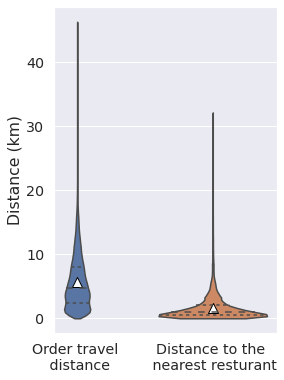

In [40]:
%%time
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(4,6)}) 
sns.set(font_scale=1.3)
ax = sns.violinplot(data=df_localness[['pandana_distance_realdist', 'nearest_dist1']], inner='quartile', cut=0) 

# Calculate means and medians
means = df_localness[['pandana_distance_realdist', 'nearest_dist1']].mean()

# Overlay mean and median lines
plt.scatter(x=range(len(means)),y=means,c="white",marker='^',edgecolors='black', s=100)

ax.set_xticklabels(['Order travel \n distance','Distance to the \n nearest resturant'])
plt.ylabel("Distance (km)")
# plt.show()
plt.savefig('./output/plot_orderdistance_and_nearest_distance.pdf',bbox_inches='tight')

In [11]:
print(df_localness[['pandana_distance_realdist', 'nearest_dist1']].describe())

       pandana_distance_realdist  nearest_dist1
count 2782961.00000              2782961.00000 
mean  5.62868                    1.65729       
std   4.06135                    1.96222       
min   0.00100                    0.00100       
25%   2.45902                    0.48570       
50%   4.72788                    1.03133       
75%   7.96135                    2.06877       
max   46.27418                   32.12371      


CPU times: user 6 s, sys: 1.49 s, total: 7.49 s
Wall time: 4.94 s


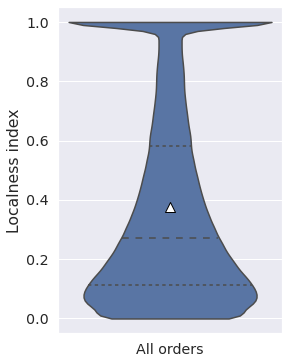

In [39]:
%%time
sns.set_theme(rc={'figure.figsize':(4,6)}) 
sns.set(font_scale=1.3)
ax = sns.violinplot(data=df_localness[['pandana_localness']], inner="quartile", cut=0)
# Calculate means and medians
means = df_localness[['pandana_localness']].mean()

# Overlay mean and median lines
plt.scatter(x=range(len(means)),y=means,c="white",marker='^',edgecolors='black', s=100)
ax.set_xticklabels(['All orders'])
plt.ylabel("Localness index")
# plt.show()
plt.savefig('./output/plot_localness.pdf',bbox_inches='tight')

In [9]:
print(df_localness[['pandana_localness']].describe())

       pandana_localness
count 2782961.00000     
mean  0.37470           
std   0.31854           
min   0.00003           
25%   0.11333           
50%   0.26982           
75%   0.58136           
max   1.00000           


In [47]:
# sns.set_theme(rc={'figure.figsize':(4,6)},style='white') 
# plt.rcParams.update({'font.size': 14})
# print(df_localness['pandana_distance_realdist'].describe())
# ax = df_localness['pandana_distance_realdist'].hist(bins=50,ec='None')
# ax.grid(False)
# # plt.title('Food order distance (km) (n='+str(df_nearest_compute.shape[0])+')')
# meanv = round(df_localness['pandana_distance_realdist'].mean(),2)
# medianv = round(df_localness['pandana_distance_realdist'].median(),2)
# plt.axvline(x=meanv,color='r',label='mean='+str(meanv)+'km',ls='--')
# plt.axvline(x=medianv,color='g',label='median='+str(medianv)+'km',ls='--')
# plt.ylabel('Order counts')
# plt.xlabel('Order distance (km)')
# ax.set_xlim([-2, 30])
# plt.legend()
# plt.savefig('./output/plot_orderdistance.pdf', bbox_inches="tight")

In [48]:
# sns.set_theme(rc={'figure.figsize':(4,6)},style='white') 
# plt.rcParams.update({'font.size': 14})
# print(df_localness['nearest_dist1'].describe())
# ax = df_localness['nearest_dist1'].hist(bins=15,ec='None')
# ax.grid(False)
# # plt.title('Food order distance (km) (n='+str(df_nearest_compute.shape[0])+')')
# meanv = round(df_localness['nearest_dist1'].mean(),2)
# medianv = round(df_localness['nearest_dist1'].median(),2)
# plt.axvline(x=meanv,color='r',label='mean='+str(meanv)+'km',ls='--')
# plt.axvline(x=medianv,color='g',label='median='+str(medianv)+'km',ls='--')
# plt.ylabel('Order counts')
# plt.xlabel('Distance to the nearest resturant (km)')
# ax.set_xlim([-2, 30])
# plt.legend()
# plt.savefig('./output/plot_distance_to_nearest.pdf', bbox_inches="tight")

In [76]:
# sns.set_theme(rc={'figure.figsize':(4,6)},style='white') 
# plt.rcParams.update({'font.size': 14})
# print(df_localness['pandana_localness'].describe().apply(lambda x: format(x, 'f')))
# ax = df_localness['pandana_localness'].hist(bins=40,ec='None')
# ax.grid(False)
# meanv = round(df_localness['pandana_localness'].mean(),2)
# medianv = round(df_localness['pandana_localness'].median(),2)
# plt.axvline(x=meanv,color='r',label='mean='+str(meanv),ls='--')
# plt.axvline(x=medianv,color='g',label='median='+str(medianv),ls='--')
# plt.legend(loc=(0.4,0.88)) #loc=(0.4,0.85)
# # plt.title('Food order localness (n='+str(df_nearest_compute.shape[0])+')')
# plt.ylabel('Order counts')
# plt.xlabel('Localness')
# plt.savefig('./output/plot_localness.pdf', bbox_inches="tight")

In [6]:
top10 = df_localness.groupby('main_cuisine').pandana_localness.mean().sort_values(ascending=False).head(10).index.tolist()
tail20 = df_localness.groupby('main_cuisine').pandana_localness.mean().sort_values(ascending=False).tail(20).index.tolist()

CPU times: user 2.77 s, sys: 4.1 s, total: 6.86 s
Wall time: 6.76 s


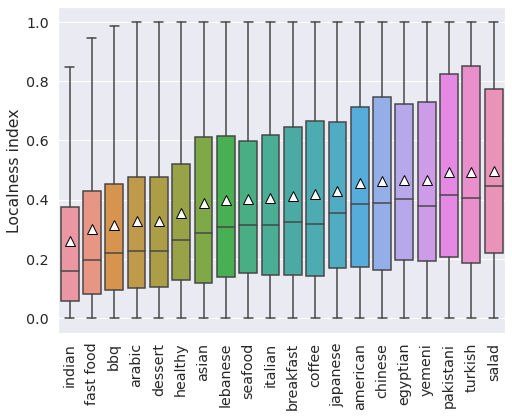

In [18]:
%%time
df_localness_select10 = df_localness[df_localness['main_cuisine'].isin(tail20)]
sns.set_theme(rc={'figure.figsize':(8,6)},font_scale=1.3)
# sns.violinplot(data=df_nearest_compute,x='main_cuisine',y='localness')
# my_order = df_localness_select10.groupby(by=["main_cuisine"])["pandana_localness"].median().sort_values().index
my_order = df_localness_select10.groupby(by=["main_cuisine"])["pandana_localness"].mean().sort_values().index
meanprops = {"marker": "^", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 10}
sns.boxplot(data=df_localness_select10,x='main_cuisine',y='pandana_localness',order=my_order, showfliers=False, showmeans=True,meanprops=meanprops)

# Add mean points on top of the boxplot
# sns.pointplot(data=df_localness_select10, x='main_cuisine', y='pandana_localness', 
#               order=my_order, estimator='mean', color='red', markers='D', linestyles='')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Localness index')
plt.savefig('./output/plot_tenleastlocalcusines.pdf', bbox_inches="tight")

# Time of day pattern of food order localness

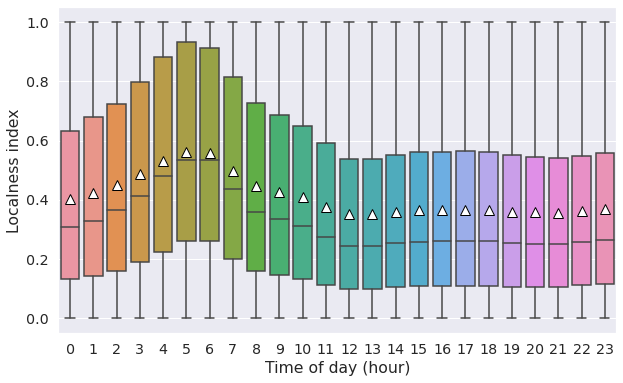

In [16]:
sns.set_theme(rc={'figure.figsize':(10,6)},font_scale=1.3)
meanprops = {"marker": "^", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 10}
sns.boxplot(data=df_localness,x='order_time_hour',y='pandana_localness', showmeans=True,meanprops=meanprops)
# plt.xticks() # rotation=90
plt.xlabel('Time of day (hour)')
plt.ylabel('Localness index')
plt.savefig('./output/plot_localness_timeofday.pdf', bbox_inches="tight")
### *** Sep 5, 2024 This is very interesting changes after considering opening hours of restaurants. Localness after midnight substantially increases!!! 

In [41]:
df_localness.head(1)

,account_id,order_id,order_date,order_time,vendor_id,vendor_name,main_cuisine,vertical,delivery_fee_amount_lc,service_fee_amount_lc,basket_amount_lc,is_incentive_applied,incentive_amount_lc,pickup_id,customer_lon,customer_lat,vendor_lon,vendor_lat,order_time_hour,delivery_duration,total_duration,node_id,nearest_dist1,poi1,n_vertical,n_vendor_id,n_main_cuisine,n_vendor_name,n_vendor_lon,n_vendor_lat,vendor_index,pandana_distance_realdist,pandana_localness,speed,customer_loc_id,isweekend,price_per_item,entropy_05km,restaurant_count_05km,entropy_1km,poi_count_1km,entropy_2km,poi_count_2km,entropy_3km,poi_count_3km,entropy_4km,poi_count_4km,entropy_5km,poi_count_5km,restaurant_count_05_1km,restaurant_count_1_2km,restaurant_count_2_3km,restaurant_count_3_4km,restaurant_count_4_5km,estimated_rent,compensation,discounted delivery,free delivery,gem,item discount,menu discount,voucher wallet,incentives_type,incentive_delivery,incentive_menu_discount,incentive_voucher_wallet,rating,n_rating,consistency,total_orders,log_pandana_localness
0,1237695,1304769890,2023-10-10,2023-10-10 00:54:08,701885,"Subz, AlBarsha 3",american,food,7.50000,1.92000,64.00000,True,30.00000,249052903.00000,55.14407,25.06988,55.19383,25.08783,0,21,50,2669233716,0.68807,1778,food,660366,american,"Cheat Day - Burgers & Salads, Jumeirah Lakes Towers",55.14022,25.06550,1778,7.29895,0.09427,8.75754,55.14406625.069883,No,0.00000,0.70242,169.00000,0.73641,322.00000,0.74026,782.00000,0.73911,853.00000,0.73745,933.00000,0.73241,1138.00000,153.00000,460.00000,71.00000,80.00000,205.00000,87.94369,0.00000,0.00000,0.00000,0.00000,0.00000,30.00000,0.00000,menu discount,False,True,False,5.None,2.Very good,0.87874,11,-2.36160


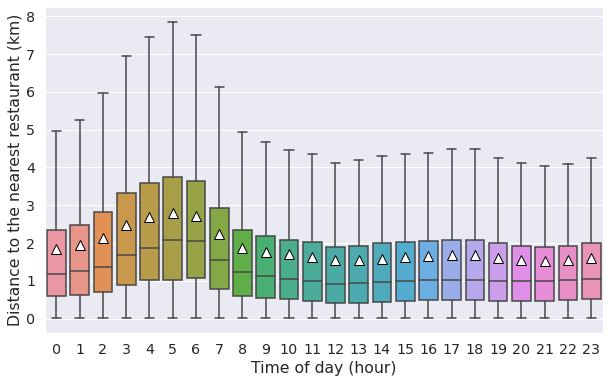

In [45]:
sns.set_theme(rc={'figure.figsize':(10,6)},font_scale=1.3)
meanprops = {"marker": "^", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 10}
sns.boxplot(data=df_localness,x='order_time_hour',y='nearest_dist1', showfliers=False,showmeans=True,meanprops=meanprops)
# plt.title('Order travel distance (km)')
plt.xlabel('Time of day (hour)')
plt.ylabel('Distance to the nearest restaurant (km)')
plt.savefig('./output/plot_distancenearest_timeofday.pdf', bbox_inches="tight")

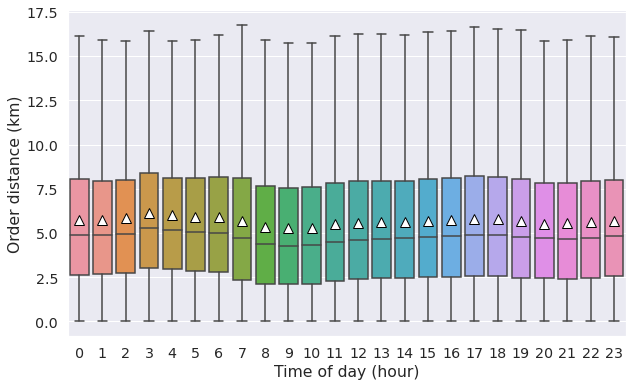

In [44]:
sns.set_theme(rc={'figure.figsize':(10,6)},font_scale=1.3)
meanprops = {"marker": "^", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 10}
sns.boxplot(data=df_localness,x='order_time_hour',y='pandana_distance_realdist', showfliers=False,showmeans=True,meanprops=meanprops)
# plt.title('Order travel distance (km)')
plt.xlabel('Time of day (hour)')
plt.ylabel('Order distance (km)')
plt.savefig('./output/plot_orderdistance_timeofday.pdf', bbox_inches="tight")

# Total distance change if all orders were from the nearest restaurant
Economic cost of localness - delivery travel distance perspective

In [19]:
df_quantifycost = df_localness[['pandana_localness','pandana_distance_realdist','nearest_dist1']]
df_quantifycost.head(2)

,pandana_localness,pandana_distance_realdist,nearest_dist1
0,0.09427,7.29895,0.68807
1,0.09427,7.29895,0.68807


In [20]:
for i in range(1,11,1):
    field = 'delta_percent' + str(i)
    step = i/10 # increment is 0.1 of localness
    df_quantifycost[field] = df_quantifycost['nearest_dist1']/(df_quantifycost['pandana_localness'] + step)
    df_quantifycost.loc[df_quantifycost[field]<=df_quantifycost['nearest_dist1'],field] = df_quantifycost['nearest_dist1']
    df_quantifycost[field] = (df_quantifycost['pandana_distance_realdist']-df_quantifycost[field])/df_quantifycost['pandana_distance_realdist']
    df_quantifycost.loc[df_quantifycost[field]<=0,field] = 0

In [21]:
for i in range(1,11,1):
    field2 = 'estimate_dist' + str(i)
    step = i/10 # increment is 0.1 of localness
    df_quantifycost[field2] = df_quantifycost['nearest_dist1']/(df_quantifycost['pandana_localness'] + step)
    df_quantifycost.loc[df_quantifycost[field2]<=df_quantifycost['nearest_dist1'],field2] = df_quantifycost['nearest_dist1']

In [22]:
df_quantifycost.head(2)

,pandana_localness,pandana_distance_realdist,nearest_dist1,delta_percent1,delta_percent2,delta_percent3,delta_percent4,delta_percent5,delta_percent6,delta_percent7,delta_percent8,delta_percent9,delta_percent10,estimate_dist1,estimate_dist2,estimate_dist3,estimate_dist4,estimate_dist5,estimate_dist6,estimate_dist7,estimate_dist8,estimate_dist9,estimate_dist10
0,0.09427,7.29895,0.68807,0.51475,0.67965,0.76090,0.80928,0.84137,0.86422,0.88131,0.89459,0.90519,0.90573,3.54182,2.33822,1.74517,1.39209,1.15784,0.99107,0.86629,0.76942,0.69203,0.68807
1,0.09427,7.29895,0.68807,0.51475,0.67965,0.76090,0.80928,0.84137,0.86422,0.88131,0.89459,0.90519,0.90573,3.54182,2.33822,1.74517,1.39209,1.15784,0.99107,0.86629,0.76942,0.69203,0.68807


In [23]:
df_quantifycost_melt_percent = pd.melt(df_quantifycost[['delta_percent1', 'delta_percent2', 'delta_percent3', 'delta_percent4', 
                                           'delta_percent5', 'delta_percent6', 'delta_percent7', 'delta_percent8', 'delta_percent9', 'delta_percent10']])

df_quantifycost_melt_distancechange = pd.melt(df_quantifycost[['pandana_distance_realdist', 'estimate_dist1', 'estimate_dist2', 'estimate_dist3',
                                                               'estimate_dist4', 'estimate_dist5', 'estimate_dist6', 'estimate_dist7', 'estimate_dist8', 
                                                               'estimate_dist9', 'estimate_dist10']])

CPU times: user 7.79 s, sys: 585 ms, total: 8.38 s
Wall time: 8.22 s


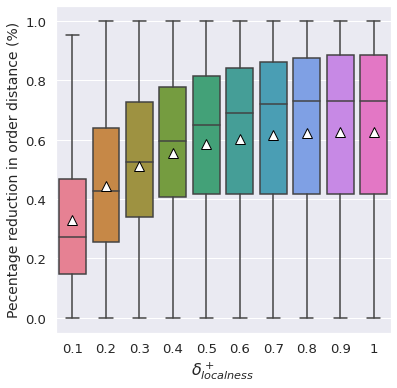

In [51]:
%%time 

meanprops = {"marker": "^", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 10}
sns.set_theme(rc={'figure.figsize':(6,6)},font_scale=1.2)
ax = sns.boxplot(x="variable", y="value", data=df_quantifycost_melt_percent,showfliers=False,palette="husl",showmeans=True,meanprops=meanprops)
plt.xlabel(r'$\delta^+_{localness}$', fontsize=16)
plt.ylabel('Pecentage reduction in order distance (%)', fontsize=14)
ax.set_xticklabels([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.savefig('./output/change_localness_percent.pdf', bbox_inches='tight')

CPU times: user 8.55 s, sys: 667 ms, total: 9.22 s
Wall time: 9.11 s


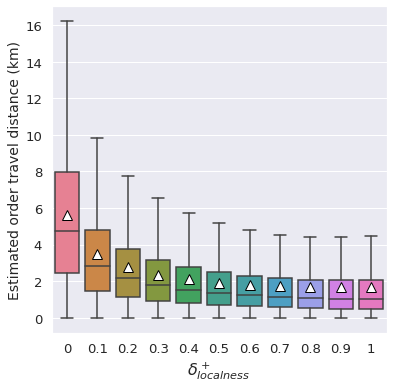

In [50]:
%%time 
sns.set_theme(rc={'figure.figsize':(6,6)},font_scale=1.2)
meanprops = {"marker": "^", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 10}
ax = sns.boxplot(x="variable", y="value", data=df_quantifycost_melt_distancechange,showfliers=False,palette="husl",showmeans=True,meanprops=meanprops)
plt.xlabel(r'$\delta^+_{localness}$', fontsize=16)
plt.ylabel('Estimated order travel distance (km)', fontsize=14)
ax.set_xticklabels([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.savefig('./output/change_localness_distance.pdf', bbox_inches='tight')

In [28]:
print(df_quantifycost.pandana_distance_realdist.median(),df_quantifycost.pandana_distance_realdist.mean())
print(df_quantifycost.estimate_dist1.median(),df_quantifycost.estimate_dist1.mean())
print(df_quantifycost.estimate_dist10.median(),df_quantifycost.estimate_dist10.mean())

4.727882 5.628681506053588
2.8253269042968747 3.4722881844274975
1.0313339843749998 1.657288739921169


In [29]:
print(df_quantifycost.delta_percent10.median(),df_quantifycost.delta_percent10.mean())

0.7301806687601872 0.6253035862098473


In [30]:
print(df_quantifycost.pandana_localness.mean())
print(df_quantifycost.pandana_distance_realdist.mean())
print(df_quantifycost.estimate_dist10.mean())

0.3746964148193625
5.628681506053588
1.657288739921169


# OLS

In [31]:
import statsmodels.api as sm

In [32]:
df_localness.columns

Index(['account_id', 'order_id', 'order_date', 'order_time', 'vendor_id', 'vendor_name', 'main_cuisine', 'vertical', 'delivery_fee_amount_lc', 'service_fee_amount_lc', 'basket_amount_lc', 'is_incentive_applied', 'incentive_amount_lc', 'pickup_id', 'customer_lon', 'customer_lat', 'vendor_lon', 'vendor_lat', 'order_time_hour', 'delivery_duration', 'total_duration', 'node_id', 'nearest_dist1', 'poi1', 'n_vertical', 'n_vendor_id', 'n_main_cuisine', 'n_vendor_name', 'n_vendor_lon', 'n_vendor_lat', 'vendor_index', 'pandana_distance_realdist', 'pandana_localness', 'speed', 'customer_loc_id', 'isweekend', 'price_per_item', 'entropy_0.5km', 'restaurant_count_0.5km', 'entropy_1km', 'poi_count_1km', 'entropy_2km', 'poi_count_2km', 'entropy_3km', 'poi_count_3km', 'entropy_4km', 'poi_count_4km', 'entropy_5km', 'poi_count_5km', 'restaurant_count_0.5_1km', 'restaurant_count_1_2km', 'restaurant_count_2_3km', 'restaurant_count_3_4km', 'restaurant_count_4_5km', 'estimated_rent', 'compensation',
       '

In [33]:
df_localness.rename(columns={"restaurant_count_0.5_1km": "restaurant_count_05_1km",
                             "entropy_0.5km": "entropy_05km",
                             "restaurant_count_0.5km": "restaurant_count_05km"
                            }, inplace=True)

In [34]:
df_localness['log_pandana_localness'] = np.log(df_localness['pandana_localness']+0.0000001)

In [11]:
df_localness.log_pandana_localness.describe()

count   2767286.00000
mean    -1.79770     
std     1.72109      
min     -10.44724    
25%     -2.35228     
50%     -1.46777     
75%     -0.67602     
max     0.00000      
Name: log_pandana_localness, dtype: float64

In [35]:
%%time
from statsmodels.formula.api import ols

# Fit the linear regression model
model = ols('pandana_localness ~ customer_lon + customer_lat + order_time_hour + total_duration + estimated_rent +  entropy_05km+ entropy_2km + entropy_5km + consistency + \
total_orders + incentive_amount_lc +  restaurant_count_05km + restaurant_count_05_1km + restaurant_count_1_2km + restaurant_count_2_3km + \
restaurant_count_3_4km + restaurant_count_4_5km + basket_amount_lc + price_per_item + C(isweekend) + C(incentive_delivery) + C(incentive_menu_discount) + \
C(incentive_voucher_wallet) + C(rating) + C(n_rating) + C(main_cuisine)', data=df_localness).fit()

# Print the model summary with significance levels
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      pandana_localness   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:03:40   Log-Likelihood:            -3.3651e+05
No. Observations:             2782961   AIC:                         6.732e+05
Df Residuals:                 2782864   BIC:                         6.745e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [17]:
# %%time
# from statsmodels.formula.api import ols

# # Fit the linear regression model
# model = ols('log_pandana_localness ~ order_time_hour + total_duration + estimated_rent +  entropy_05km+ entropy_2km + entropy_5km + consistency + \
# total_orders + incentive_amount_lc +  restaurant_count_05km + restaurant_count_05_1km + restaurant_count_1_2km + restaurant_count_2_3km + \
# restaurant_count_3_4km + restaurant_count_4_5km + basket_amount_lc + price_per_item + C(isweekend) + C(incentive_delivery) + C(incentive_menu_discount) + \
# C(incentive_voucher_wallet) + C(rating) + C(n_rating) + C(main_cuisine)', data=df_localness).fit()

# # Print the model summary with significance levels
# print(model.summary())

In [12]:
# df_localness.rating.value_counts()

2.Very good    1593856
1.Amazing      737925 
5.None         388748 
3.Good         46401  
4.OK           356    
Name: rating, dtype: int64

In [13]:
# df_localness.n_rating.value_counts()

2.Very good    1490883
5.None         574897 
1.Amazing      563732 
3.Good         130681 
4.OK           7093   
Name: n_rating, dtype: int64